# Scenarios

The scenarios are taken from https://twiki.cern.ch/twiki/bin/view/LHCPhysics/SUSYCrossSections.

Modifications:
-   we set the STAUMIX values to maximally mixed for sleptons
-   we manually set the massses of all particles tagged with an @a or {M...} 

In [1]:
#%load_ext nb_black
import hepi


print(hepi.__version__)
import smpl
from smpl import data
import numpy as np
import hepi.resummino as rs
import hepi.util as util
import matplotlib.pyplot as plt

rs.set_path("~/git/resummino/build")
print(rs.get_path())

test_lo = False
analyse  = True # else generation

/usr/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: xsec-explore-pdfs-dist.3-dirty is an invalid version and will not be supported in a future release
  warnings.warn(


dirty
~/git/resummino/build


/usr/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: xsec-explore-pdfs-dist.3-dirty is an invalid version and will not be supported in a future release
  warnings.warn(


# aNNLO+NNLL wino


In [2]:
params = [
    "wino.slha",
]
pss = [
    ( 1000023, +1000024),  # N1C1p
    ( 1000023, -1000024),  # N1C1m
    (+1000024, -1000024),  # C1pC1m
]
for energy in [13000, 13600]:
    for pa, pb in pss:
        hepi.set_output_dir(
            "output_" + str(energy) + "_wino_" + str(pa) + "_" + str(pb) + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                energy,
                pa,
                pb,
                param,
                "PDF4LHC21_40",
                "PDF4LHC21_40",
                1.0,
                1.0,
                id="0.0.0",
                precision=0.001,
                max_iters=50,
            )
            li = [i]
            li = hepi.masses_scan(
                li,
                [
                    1000022,
                    1000023,
                    1000024,
                ],
                range(100, 2010, 100),
            )
            if not test_lo:
                
                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    hepi.title(li[0])
                    #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                    #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_SCALE",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_PDF",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),ratio=True,show=True,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    
            else:
                rs_dl = rs.run(li, skip=True, run=True, parse=True)
                hepi.mass_plot(rs_dl,"LO",1000022,show=True,interpolator='cubic',pre=np.log,post=np.exp)

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||= 940 jobs


KeyboardInterrupt: 

# aNNLO+NNLL hino degenerate


/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.04643528285437358% vs 0.5143521868569908% to -0.41144771018794546%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.04722211806021195% vs 0.451629998932007% to -0.31379600050364437%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numeric

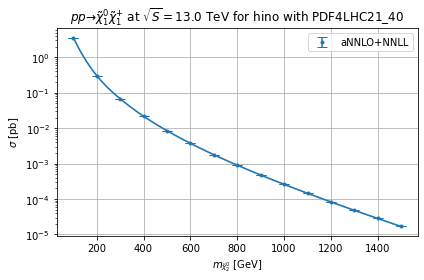

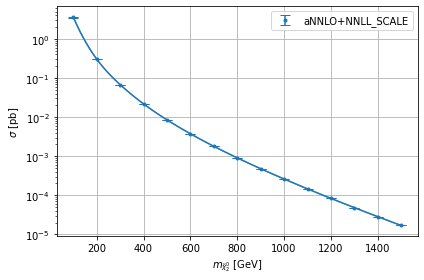

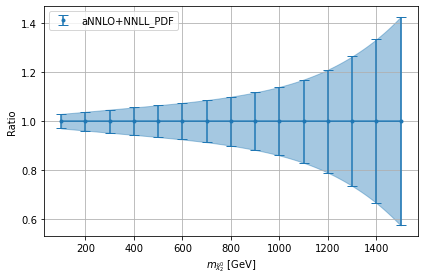

/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.03947570685787525% vs 0.3651856529193618% to -0.34613073918289045%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.03806948625344699% vs 0.3273109252677283% to -0.24732249878107204%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numeri

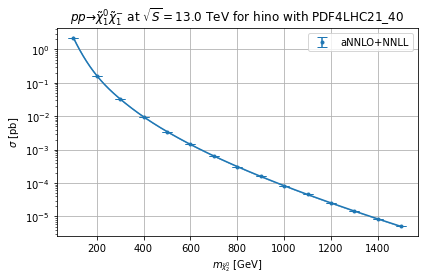

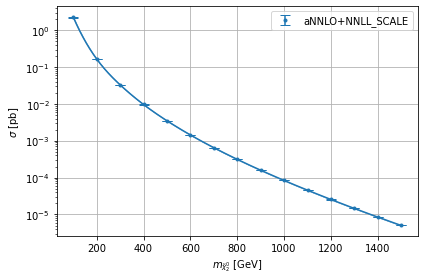

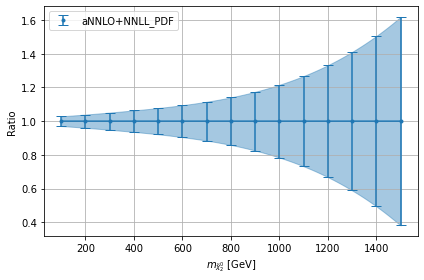

/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ LO 0.04246611466482% vs 0.3758134525701861% to -0.7962663093590037%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.04742944363208906% vs 0.42165993600188123% to -0.3996618004183861%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs 

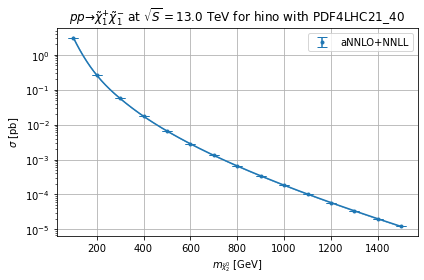

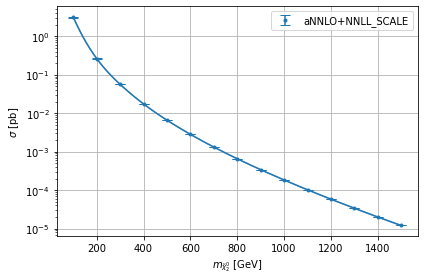

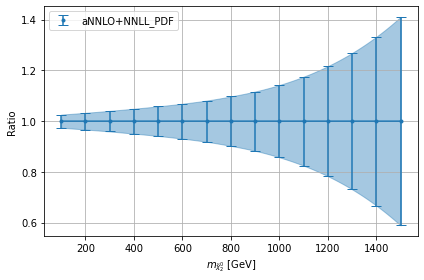

/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ LO 0.04150183747337949% vs 0.38647866989266744% to -0.8071636075958053%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.04663973025913986% vs 0.4206084932757443% to -0.39082698882779077%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision

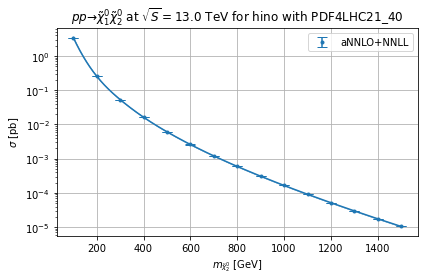

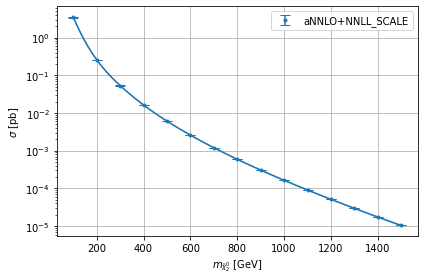

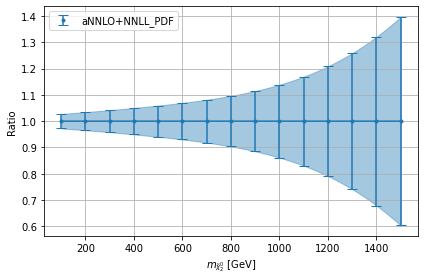

/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ LO 0.04309586142182388% vs 0.21211415293660466% to -0.6469647981304008%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.04676980590836381% vs 0.5213083783433754% to -0.44522184533957404%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision

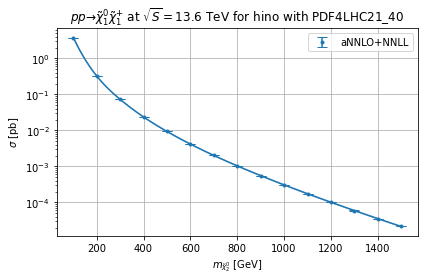

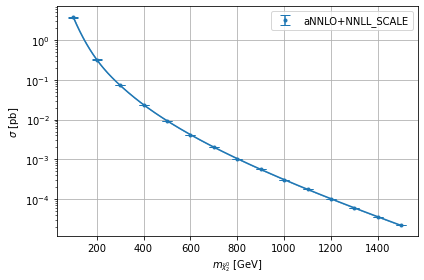

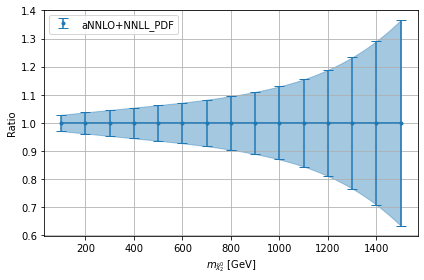

/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ LO 0.040195288974951275% vs 0.19065131395656834% to -0.6647468394568475%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.039751884805062414% vs 0.3802822683183046% to -0.36342285393654633%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precisi

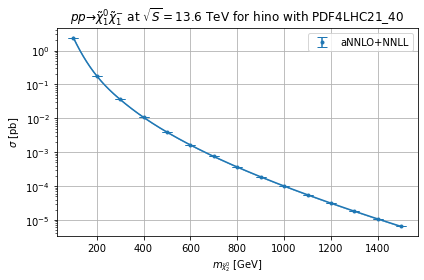

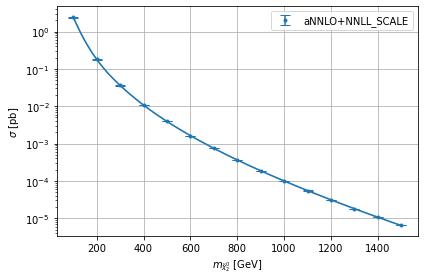

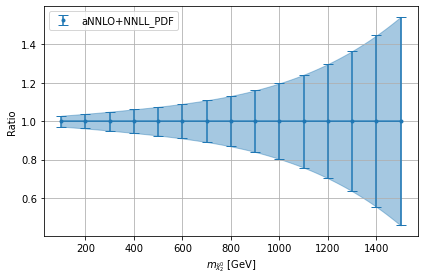

/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ LO 0.0426199942217945% vs 0.10115642284863897% to -0.5561417726515643%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.04766660402705047% vs 0.4268465733384942% to -0.42757692306489214%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision 

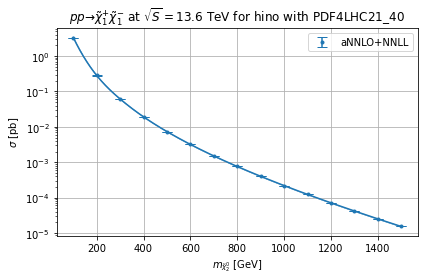

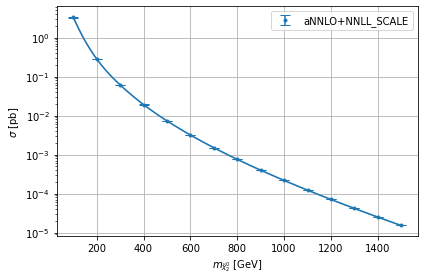

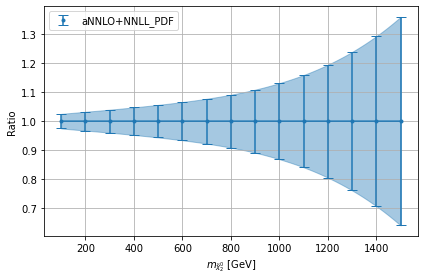

/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ LO 0.041661719660808165% vs 0.10732499422582724% to -0.5632317398429377%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.047094770829678397% vs 0.42507724275114506% to -0.413674856858836%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precisio

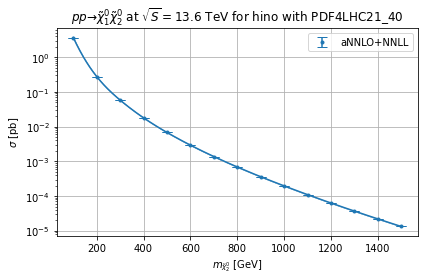

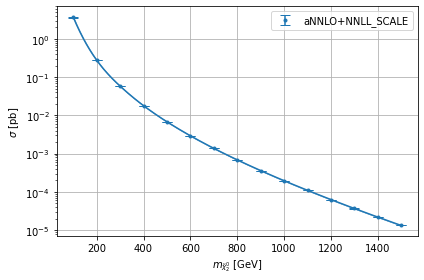

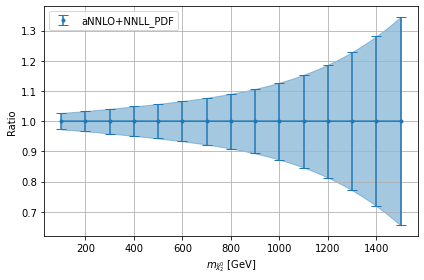

In [28]:
params = [
    "hino.slha",
]
pss = [
    (1000022, +1000024),  # N2C1p
    (1000022, -1000024),  # N2C1m
    (+1000024, -1000024),  # C1pC2m
    (1000022, 1000023),  # N2N1
]
for energy in [13000, 13600]:
    for pa, pb in pss:
        # save to different folders to have some substructure
        hepi.set_output_dir(
            "output_" + str(energy) + "_hino_deg_" + str(pa) + "_" + str(pb) + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                energy,
                pa,
                pb,
                param,
                "PDF4LHC21_40",
                "PDF4LHC21_40",
                1.0,
                1.0,
                id="0.0.0",
                precision=0.001,
                max_iters=50,
            )
            li = [i]
            li = hepi.masses_scan(
                li,
                [
                    1000022,
                    1000023,
                    1000024,
                ],
                range(100, 1510, 100),
                negate=[1000022],
            )
            if not test_lo:
                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    hepi.title(li[0])
                    #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                    #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000023,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_SCALE",1000023,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_PDF",1000023,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),ratio=True,show=True,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
            else:
                rs_dl = rs.run(li, skip=False, run=True, parse=True)
                hepi.mass_plot(rs_dl,"LO",1000023,show=True,interpolator='exp')

# aNNLO+NNLL sleptons

/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.05404978384317863% vs 0.7342868370433671% to -0.4877603924612421%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.05309169873215867% vs 0.6061377585280296% to -0.35875964169751207%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numeric

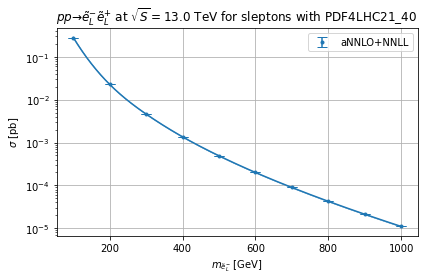

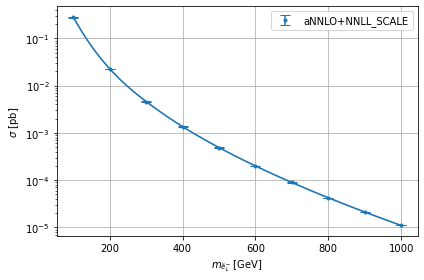

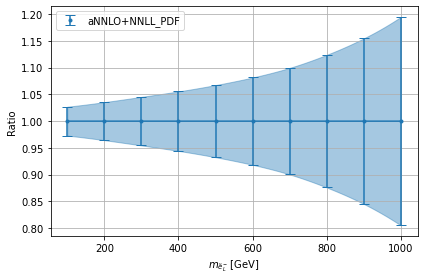

/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.054545646981038906% vs 0.7409226449097863% to -0.4872443061448642%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.053733591643772116% vs 0.6093030039541241% to -0.37580263890641297%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numer

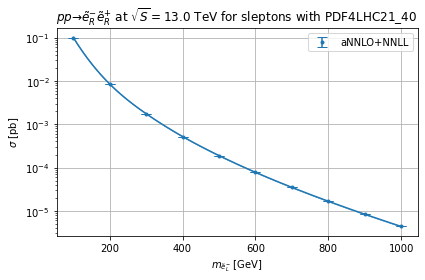

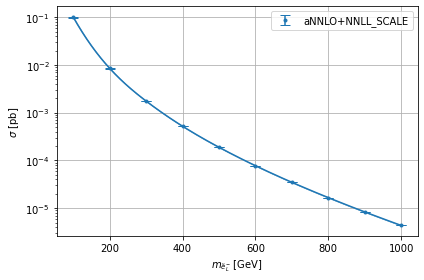

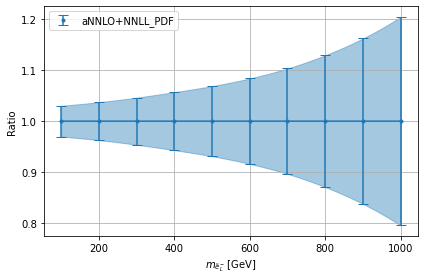

/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

Performing PDF fit with 5 flavors with M^2/S = 0.0236686, Q^2 = 1e+06
 and weights: valence: x^-1.6, sea: x^-1.6, gluon: x^-1.6 and xmin = 0.0236686 
 Fit function: f = A0 * x^A1 * (1 - x)^A2 * ( 1 + A3 * x^(1/2) + A4 * x + A5 * x^(3/2) + A6 * x^2 + A7 * x^(5/2) )
Fitting gluon PDF... done.
Fit result:
A0 =  1.15288 # +-49287.30612
A1 =  -1.53180 # +-952.61185
A2 =  1.68612 # +-1551537.87727
A3 =  -4.20099 # +-414094.70203
A4 =  7.01762 # +-6548076.05845
A5 =  -5.46934 # +-19054136.44772
A6 =  1.60359 # +-13633414.91106
A7 =  0.05453 # +-1560149.07794
Fitting valence down quark PDF... done.
Fit result:
A0 =  8.66786 # +-5246976.76310
A1 =  -0.20573 # +-2864.58111
A2 =  2.66220 # +-372669.35070
A3 =  -5.48137 # +-117661.22871
A4 =  15.64912 # +-2104677.69879
A5 =  -25.48393 # +-5001674.49773
A6 =  21.21720 # +-2492766.74911
A7 =  -6.91793 # +-252369.10172
Fitting valence up quark PDF... done.
Fit result:
A0 =  4.62927 # +-284410640.66539
A1 =  -0.43449 # +-287200.25986
A2 =  2.84042 # +

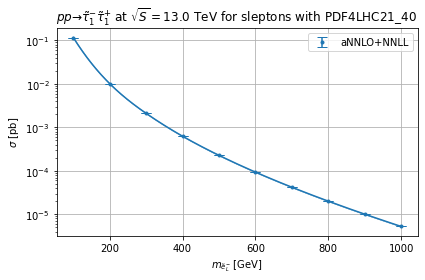

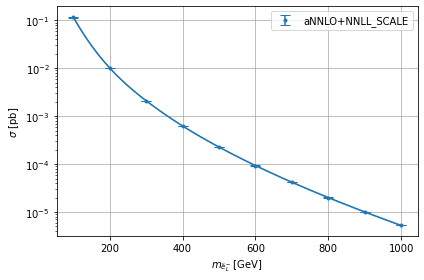

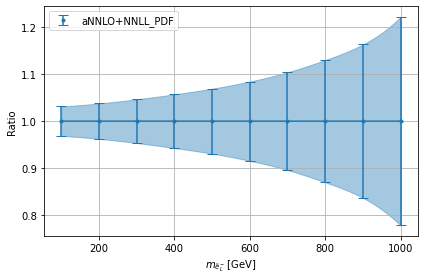

/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.054591916531596923% vs 0.7479131187377929% to -0.5206682191812755%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.05327744464774955% vs 0.6142173969907097% to -0.38537155151092417%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numeri

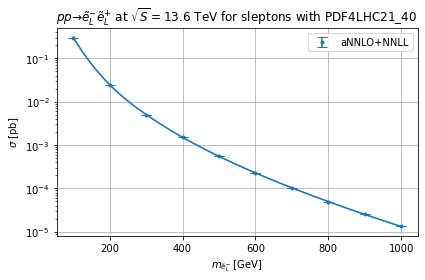

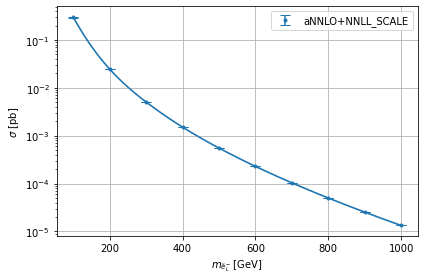

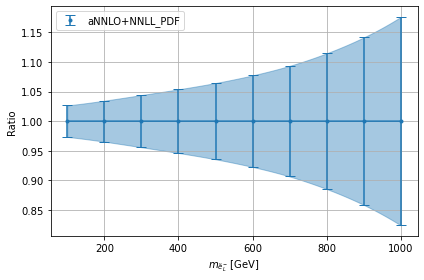

/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.055726675527242094% vs 0.7526267794575673% to -0.5087233853141606%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.052314736460065216% vs 0.6171507106210362% to -0.3743806309879148%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numeri

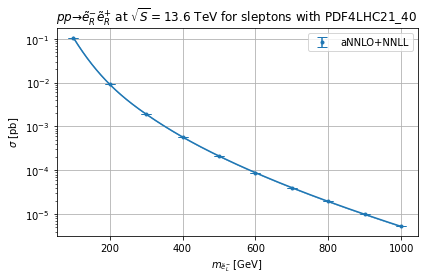

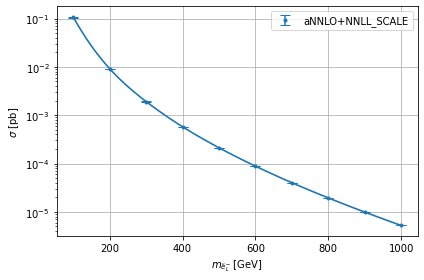

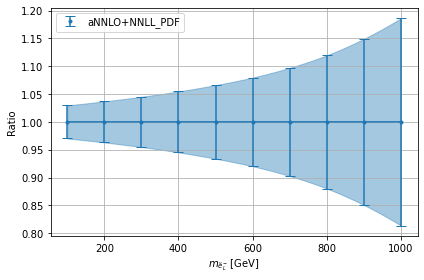

/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.05586166702856262% vs 0.753138530943403% to -0.50587175292749%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ aNNLO_PLUS_NNLL 0.05240180776838549% vs 0.6173097306098332% to -0.37398628710209236%
  warnings.warn("too bad numerical precision vs scale @ "+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs " +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical 

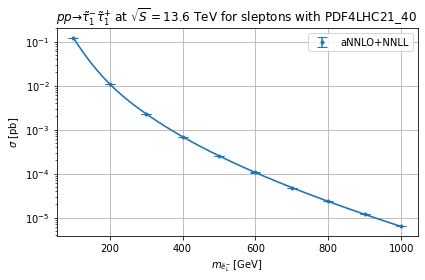

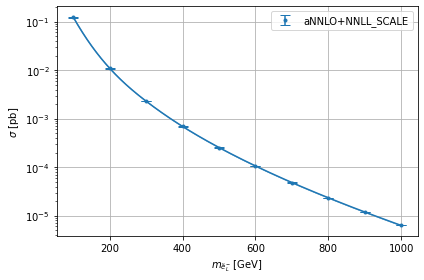

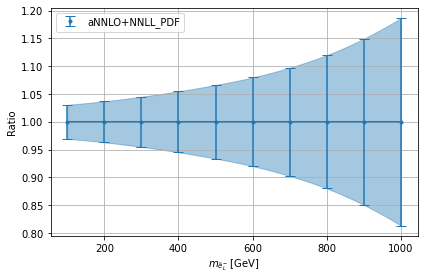

In [27]:
params = [
    "sleptons.slha",
]
pss = [
    (+1000011, -1000011),  # l_L^+ l_L^-
    (+2000011, -2000011),  # l_R^+ l_R^-
    (+1000015, -1000015),  # l_1^+ l_1^-
]
for energy in [13000, 13600]:
    for pa, pb in pss:
        hepi.set_output_dir("output_" + str(energy) + "_sleptons_" + str(pa) + "_" + str(pb) +"/")
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                energy,
                pa,
                pb,
                param,
                "PDF4LHC21_40",
                "PDF4LHC21_40",
                1.0,
                1.0,
                id="0.0.0",
                precision=0.001,
                max_iters=50,
            )
            li = [i]
            li = hepi.masses_scan(
                li,
                [
                    1000011,
                    2000011,
                    1000012,
                    1000013,
                    2000013,
                    1000014,
                    1000015,
                    2000015,
                    1000016,
                ],
                range(100, 1010, 100),
            )
            if not test_lo:
                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    hepi.title(li[0])
                    #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                    #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000011,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_SCALE",1000011,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_PDF",1000011,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),ratio=True,show=True,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
            else:
                rs_dl = rs.run(li, skip=False, run=True, parse=True)
                hepi.mass_plot(rs_dl,"LO",1000011,show=True,interpolator='exp')

# aNNLO+NNLL hino non-degenerate

/home/apn/.local/lib/python3.8/site-packages/hepi/util.py:160: UserWarning: PDF set 'CTEQ6.6 and MSTW2008nlo90cl' not installed!
  warnings.warn("PDF set '" + name + "' not installed!")
/home/apn/.local/lib/python3.8/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.043467331681865354% vs scale:0.0% to -0.41095332115928884%
  warnings.warn("too bad numerical precision vs scale @ num:"+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs scale:" +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04345498544945606% vs scale:0.0% to -0.39095866868320134%
  warnings.warn("too bad numerical precision vs scale @ num:"+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs scale:" +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision v

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04048231467270843% vs scale:0.0% to -0.4552434675526815%
  warnings.warn("too bad numerical precision vs scale @ num:"+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs scale:" +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.040472810221371315% vs scale:0.0% to -0.43457588373255013%
  warnings.warn("too bad numerical precision vs scale @ num:"+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs scale:" +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04291576683640941% vs scale:0.0% to -0.49112809188747153%
  warnings.warn("too bad numerical precision vs scale @ num:"+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs scale:" +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.043183361041455016% vs scale:0.3644007818150394% to -0.9730785170220589%
  warnings.warn("too bad numerical precision vs scale @ num:"+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs scale:" +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numeric

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04196898490778752% vs scale:0.0% to -0.5062421078091154%
  warnings.warn("too bad numerical precision vs scale @ num:"+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs scale:" +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.042217428157544076% vs scale:0.3805699567728424% to -0.9944904471603172%
  warnings.warn("too bad numerical precision vs scale @ num:"+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs scale:" +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerica

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.043664724228031505% vs scale:0.12032796765961248% to -0.6821210979566424%
  warnings.warn("too bad numerical precision vs scale @ num:"+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs scale:" +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.043651885471884616% vs scale:0.10309116221353912% to -0.6621504219865462%
  warnings.warn("too bad numerical precision vs scale @ num:"+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs scale:" +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04062715134217595% vs scale:0.12807306278865474% to -0.7340945566332605%
  warnings.warn("too bad numerical precision vs scale @ num:"+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs scale:" +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.040617678832172266% vs scale:0.11027655555788006% to -0.7134268563564502%
  warnings.warn("too bad numerical precision vs scale @ num:"+ordername + " " + str(plot.usd(dl[ordername][i])/rel*100.) + "% vs scale:" +str(dl[ordername+"_SCALE_ERRPLUS"][i]/rel*100.) + "% to " + str(dl[ordername+"_SCALE_ERRMINUS"][i]/rel*100.) + "%"  ,
/home/apn/.local/lib/python3.8/site-packages/hepi/results.py:327: RuntimeWarning:

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

KeyboardInterrupt: 

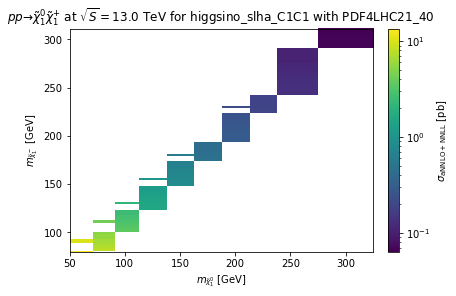

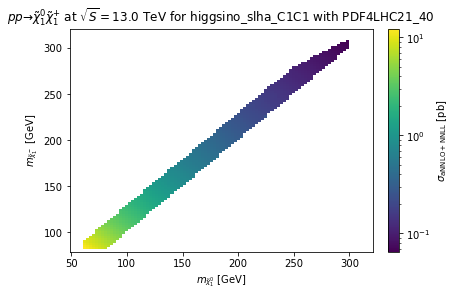

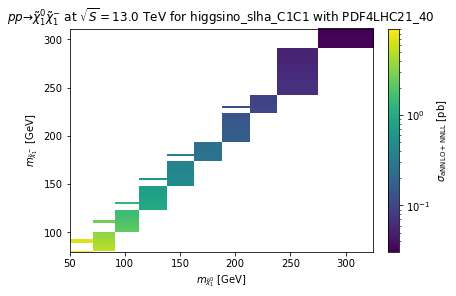

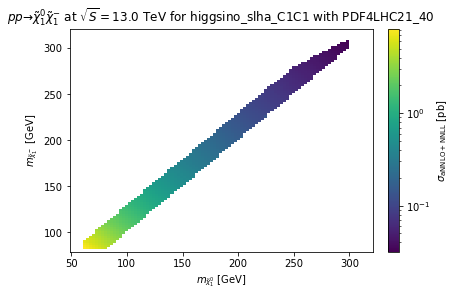

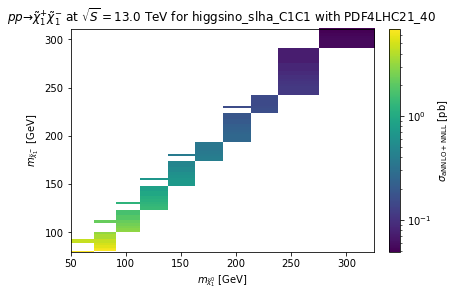

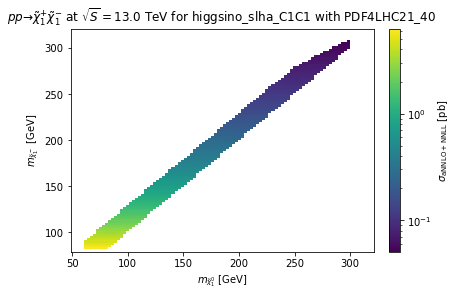

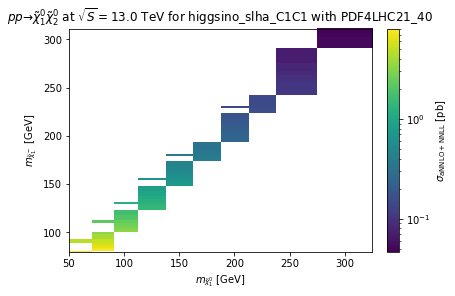

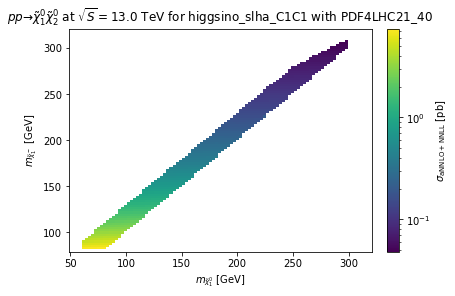

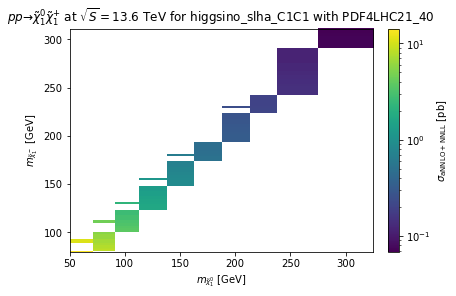

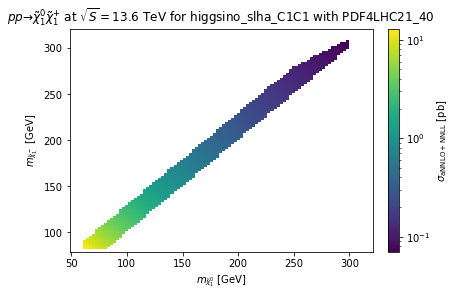

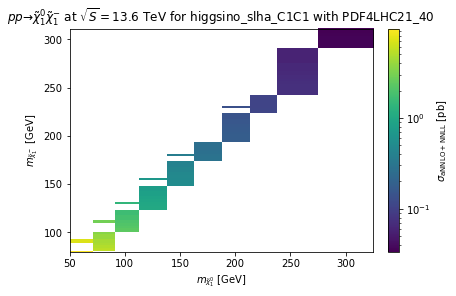

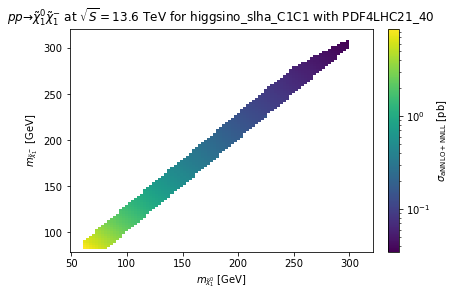

In [11]:
params = [
    "higgsino_slha_C1C1.slha",
]
pss = [
    ( 1000022, +1000024),  # N2C1p
    ( 1000022, -1000024),  # N2C1m
    (+1000024, -1000024),  # C1pC1m
    ( 1000022,  1000023),  # N2N1
]
import urllib

dl = hepi.load(
    urllib.request.urlopen(
        "https://raw.githubusercontent.com/APN-Pucky/xsec/master/json/pp13_hinosplit_N2N1_NLO%2BNLL.json"
    ),
    dimensions=2,
)
N1 = dl["N1"]
N2 = dl["N2"]
NX = dl["N1"] / 2 + dl["N2"] / 2
for energy in [13000, 13600]:
    for pa, pb in pss:
        # save to different folders to have some substructure
        hepi.set_output_dir(
            "output_" + str(energy) + "_hino_nondeg_" + str(pa) + "_" + str(pb) + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                energy,
                pa,
                pb,
                param,
                "PDF4LHC21_40",
                "PDF4LHC21_40",
                1.0,
                1.0,
                id="0.0.0",
                precision=0.001,
                max_iters=50,
            )
            li = [i]
            li = hepi.slha_scan_rel(
                li,
                lambda r: [
                    ["MASS", 1000022, N1[r]],
                    ["MASS", 1000023, -N2[r]],
                    ["MASS", 1000024, NX[r]],
                ],
                range(len(N1)),
            )
            if not test_lo:
                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=True, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True)
                    
                    
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()
                    
                    hepi.mapplot(rs_dl[mask],"MASS_1000022","MASS_1000024","aNNLO_PLUS_NNLL_COMBINED",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{\\chi}_1^-}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{aNNLO+NNLL}}$ [pb]")

                    hepi.title(li[0])

                    xx,yy = data.flatmesh(np.linspace(50,320,100),np.linspace(80,320,100))
                    dll = hepi.interpolate_2d(rs_dl[mask],"MASS_1000022","MASS_1000024","aNNLO_PLUS_NNLL_COMBINED",xx,yy,interpolator="linearnd",pre=np.log,post=np.exp)             
                    hepi.mapplot(dll,"MASS_1000022","MASS_1000024","aNNLO_PLUS_NNLL_COMBINED",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{\\chi}_1^-}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{aNNLO+NNLL}}$ [pb]",fill_missing=False)
                    hepi.title(li[0])
                
            else:
                rs_dl = rs.run(li, skip=True, run=True, parse=True)
                hepi.mapplot(rs_dl,"MASS_1000022","MASS_1000024","LO",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{\\chi}_1^-}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{NLO+NLL}}$ [pb]")

/usr/lib/python3.8/site-packages/numpy/lib/function_base.py:2387: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


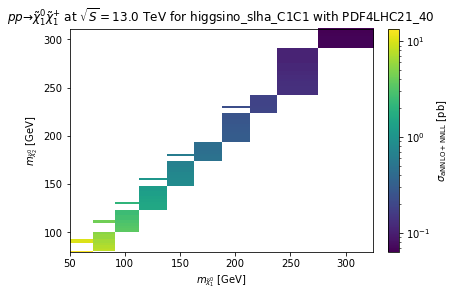

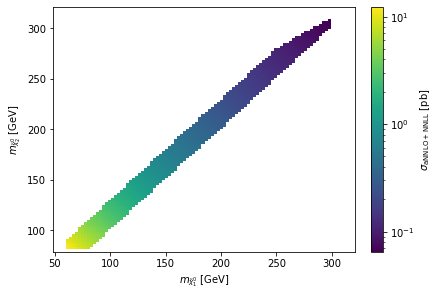